### Numerical Erosion Method

In [178]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [397]:
def Erosion_algo(img, kernel_size = 3, kernel_type = 'square'):
    """This function erode the image numerically based on the selected elements"""
        
    orig_shape = img.shape
    
    #Type of Elements
    if len(orig_shape) == 2:
        if kernel_type == 'square':
            kernel = 255*np.array([[1,1,1],
                                   [1,1,1],
                                   [1,1,1]])
        elif kernel_type == 'ball':
            kernel = 255*np.array([[0,1,0],
                                   [1,1,1],
                                   [0,1,0]])
        else:
            try:
                print("="*50)
                print("Given 2D-element is: ", kernel_type)
                print("The element type is not implemented in the function for 2D image.")
                print("Function is returning the original image")
                print("="*50)

            finally:
                return img;

    elif len(orig_shape) == 3:
        if kernel_type == "cube":
            kernel = 255*np.array([[[1,1,1], [1,1,1], [1,1,1]],
                                   [[1,1,1], [1,1,1], [1,1,1]],
                                   [[1,1,1], [1,1,1], [1,1,1]]])

        else:
            try:
                print("="*50)
                print("Given 3D-element is: ", kernel_type)
                print("The element type is not implemented in the function for 3D image.")
                print("Function is returning the original image")
                print("="*50)

            finally:
                return img;

    #Pad is the matrix in which the kernel can fit
    pad_width = 1
    pad_matrix = np.pad(img, pad_width=pad_width, mode='constant')
    pad_shape = pad_matrix.shape
    dim_reduce = [pad_shape[i]-orig_shape[i] for i in range(len(orig_shape))]
     
    flat_submatrix = np.array([pad_matrix[i:(i+3), j:(j+3), k:(k+3)]\
                               for i in range(pad_shape[0] - dim_reduce[0])\
                               for j in range(pad_shape[1] - dim_reduce[1])\
                               for k in range(pad_shape[2] - dim_reduce[2])]) 

    #Final Erosion conditions
    erode_img = np.array([255 if (i[kernel>0] == kernel[kernel>0]).all() else 0 for i in flat_submatrix])
    erode_img = erode_img.reshape(orig_shape)
    
    
    return erode_img
    
    
    
def Porosity(img):
    wid, lent = np.shape(img)
    return 100*(1 - np.sum(np.sum(img,axis = 0))/(wid*lent*255))

### TestCase

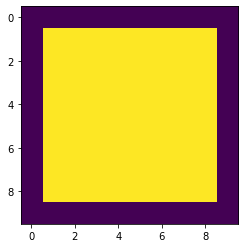

In [396]:
test_img = 255*np.ones(shape = (10,10,10))
test_img[5,5,5] = 0
erod_test_img = Erosion_algo(test_img, kernel_type='cube')

# imshow(test_img[0])
imshow(erod_test_img[3])
# print(erod_test_img[4])

In [389]:
##testing
kernel = 255*np.array([[[0,0,0], [1,1,1], [0,0,0]],
                       [[0,1,0], [1,1,1], [0,1,0]],
                       [[0,0,0], [1,1,1], [0,0,0]]])


print(kernel)
a = np.array([[[2,3,0],[4,5,6],[0,7,0]], 
              [[2,3,0],[7,8,9],[0,14,0]], 
              [[2,3,0],[11,12,13],[0,7,0]]])

b = np.array([[[2,3,4],[4,1,6],[1,7,8]], 
              [[2,3,4],[7,8,9],[1,14,6]], 
              [[2,3,4],[11,12,13],[1,7,5]]])


(a[kernel > 0] == b[kernel> 0]).all()

[[[  0   0   0]
  [255 255 255]
  [  0   0   0]]

 [[  0 255   0]
  [255 255 255]
  [  0 255   0]]

 [[  0   0   0]
  [255 255 255]
  [  0   0   0]]]


False

### Real Image test later

In [354]:
import PIL

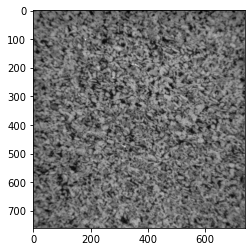

In [355]:
img = np.asarray(PIL.Image.open('Smerdyna.jpg').convert('L'))
imshow(img,cmap='gray')

 Porosity is  39.41678102250857


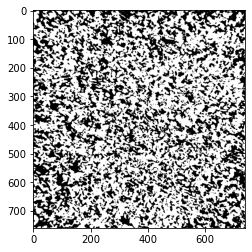

In [356]:
thres_val = 99
img[img < thres_val]=0
img[img > thres_val]=255
print(" Porosity is ", Porosity(img))

imshow(img,cmap = 'gray')


Porosity is:  54.66642958748223


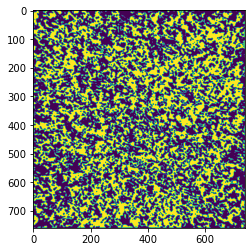

In [357]:
erod_img = Erosion_algo(img, kernel_type='ball')
print("Porosity is: ", Porosity(erod_img))
imshow(erod_img)